<a href="https://colab.research.google.com/github/andrehochuli/teaching/blob/main/Extens%C3%A3o-DS/T%C3%B3pico%2003%20-%20Aprendizado%20Supervisionado%20-%20KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tutorial KNN

Neste tutorial, iniciaremos nossas práticas de aprendizado de máquina utilizando a biblioteca scikit-learn, que é uma das principais ferramentas de aprendizado de máquina em Python.

Dentre os algoritmos de classificação disponíveis nesta biblioteca, vamos começar com o KNN, que significa "K-Nearest Neighbors" ou "K-Vizinhos Mais Próximos". Esse algoritmo é um dos mais simples e populares da área de aprendizado de máquina.

O KNN é um método não-paramétrico de classificação, ou seja, ele não assume nada sobre a distribuição dos dados. O funcionamento do algoritmo se baseia na ideia de que amostras semelhantes tendem a estar próximas umas das outras no espaço de atributos.

Dado um conjunto de dados de treinamento com amostras já classificadas, o KNN determina a classe de uma amostra de teste a partir dos K vizinhos mais próximos a ela no espaço de atributos. A classe da amostra de teste é determinada por voto majoritário entre as classes dos seus K vizinhos mais próximos.

Abaixo ilustra-se o KNN:

> > > > > 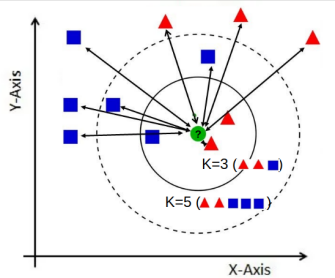

#Dataset sintético

  Utilizamos a função make_blobs() para criar uma distribuição de dados que será usada para avaliar o desempenho do KNN. Essa função permite criar conjuntos de dados artificiais com uma determinada quantidade de centroídes e diferentes desvios-padrão.

No entanto, mais adiante no tutorial, produziremos distribuições de dados mais complexas, que permitirão avaliar o desempenho do KNN em situações mais desafiadoras. Dessa forma, poderemos entender melhor as limitações e os pontos fortes do algoritmo, bem como explorar diferentes técnicas para melhorar sua eficiência.

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

random_seed=9999

#centro de massa da distribuição
centers = [[1, 2], [7, 5], [3, 12]]
n_classes = len(centers)

#criação da distribuição (300 instâncias 2 features)
data, labels = make_blobs(n_samples=300, n_features=2,
                          centers=np.array(centers),
                          random_state=random_seed)

for sample, label in zip(data[:10],labels[:10]):
  print(sample, label)


[1.88251299 0.21776835] 0
[-0.14158407  0.56091061] 0
[8.23809819 5.45613494] 1
[ 2.38615696 12.5106381 ] 2
[ 3.37055279 12.60774395] 2
[ 3.17995786 11.41664478] 2
[ 4.38621013 12.4870083 ] 2
[-0.19880191  4.93170517] 0
[1.11984837 2.18259889] 0
[7.23151031 4.51579089] 1


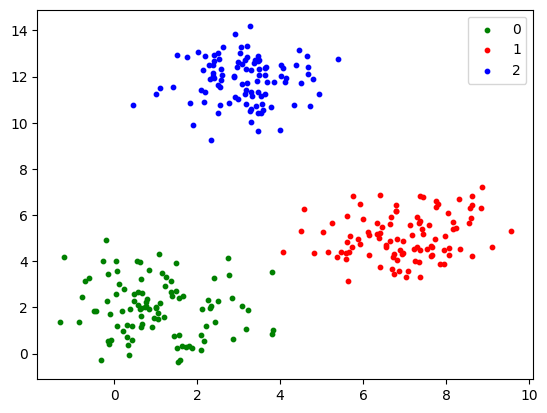

In [3]:
#Exibição
colours = ('green', 'red', 'blue')
n_classes = 3

fig, ax = plt.subplots()
for n_class in range(0, n_classes):
    ax.scatter(data[labels==n_class, 0], data[labels==n_class, 1],
               c=colours[n_class], s=10, label=str(n_class))



ax.legend(loc='upper right');

#Preparação dos dados

Uma etapa crucial no aprendizado de máquina é a preparação dos dados. Esta etapa inclui normalmente:


*   Análise Exploratória
*   Normalização
*   Método de Validação





##Holdout (Train-Val | Test)

In [4]:
#70% treino - 30% test
train_data, test_data, train_labels, test_labels = train_test_split(data, labels,
                       train_size=0.7,
                       test_size=0.3,
                       random_state=random_seed)

#Porção do treinamento fica para validação (70-30)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels,
                       train_size=0.7,
                       test_size=0.3,
                       random_state=random_seed)



Avaliação Geral

In [5]:
centers = [[1, 2], [7, 5], [3, 12]]
n_classes = len(centers)

#criação da distribuição (300 instâncias 2 features)
data, labels = make_blobs(n_samples=300, n_features=2,
                          centers=np.array(centers),
                          random_state=random_seed)

#Criação do modelo com seus hiper-parâmetros


*   Distância
*   K-Vizinhos




In [6]:
from sklearn.neighbors import KNeighborsClassifier


#p=1 ~ Manhattan Distance
#p=2 ~ Euclidean
#p!=1|2 ~ minkowski
knn = KNeighborsClassifier(metric='minkowski',
                           p=2,
                           n_neighbors=5)


knn.fit(train_data,train_labels)


KNeighborsClassifier()

#Teste do modelo

In [7]:
#computa as classes para todos
predicts = knn.predict(test_data)

from sklearn.metrics import accuracy_score
acc = accuracy_score(test_labels,predicts)
print(acc)

1.0


###Metricas de Avaliação
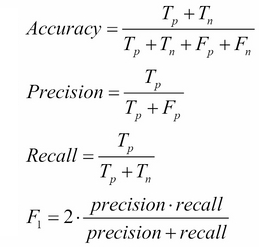

In [8]:
from sklearn.metrics import accuracy_score
example_predictions = [0, 2, 1, 3, 2, 0, 1, 2, 0]
example_labels      = [0, 2, 2, 3, 2, 1, 1, 1, 1]
acc = accuracy_score(example_labels,example_predictions)
print(f'Acc: {acc}')

Acc: 0.5555555555555556


In [9]:
from sklearn.metrics import classification_report
print(classification_report(example_labels,example_predictions))

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.50      0.25      0.33         4
           2       0.67      0.67      0.67         3
           3       1.00      1.00      1.00         1

    accuracy                           0.56         9
   macro avg       0.62      0.73      0.62         9
weighted avg       0.59      0.56      0.54         9



#Analise Crítica
Vamos analisar o desempenho do KNN quanto:


*   Distribuição
*   K Vizinhos
*   Quantidade de amostras




(300, 2) (300,)
[1.88251299 0.21776835] 0
[-0.14158407  0.56091061] 0
[8.23809819 5.45613494] 1
[ 2.38615696 12.5106381 ] 2
[ 3.37055279 12.60774395] 2
[ 3.17995786 11.41664478] 2
[ 4.38621013 12.4870083 ] 2
[-0.19880191  4.93170517] 0
[1.11984837 2.18259889] 0
[7.23151031 4.51579089] 1


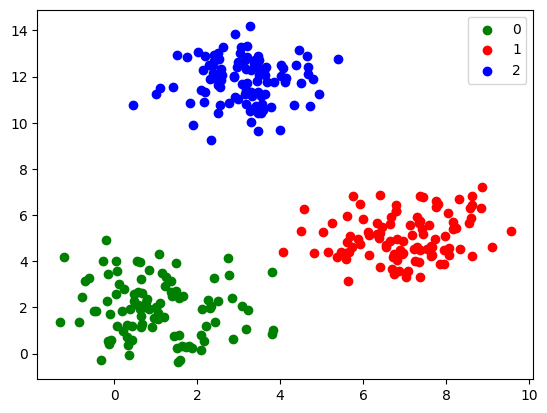


Acc: 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        27

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



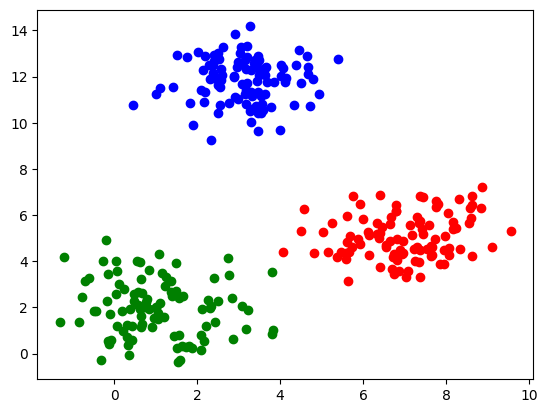

In [10]:
#centro de massa da distribuição
centers = [[1, 2], [7, 5], [3, 12]]
n_classes = len(centers)

#criação da distribuição (300 instâncias 2 features)
data, labels = make_blobs(n_samples=300, n_features=2,
                          centers=np.array(centers),
                          random_state=random_seed)


print(data.shape, labels.shape)

for sample, label in zip(data[:10],labels[:10]):
  print(sample, label)




#Exibição

colours = ('green', 'red', 'blue','yellow',
           'purple','salmon','orange',
           'brown','greenyellow','gray')

n_classes = len(np.unique(labels))

fig, ax = plt.subplots()
for n_class in range(0, n_classes):

    ax.scatter(data[labels==n_class, 0], data[labels==n_class, 1],
               c=colours[n_class], label=str(n_class))

ax.legend(loc='upper right')

plt.show()
#70% treino - 30% test
train_data, test_data, train_labels, test_labels = train_test_split(data, labels,
                       train_size=0.7,
                       test_size=0.3,
                       random_state=random_seed)

#Porção do treinamento fica para validação (70-30)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels,
                       train_size=0.7,
                       test_size=0.3,
                       random_state=random_seed)

knn = KNeighborsClassifier(metric='minkowski',
                           p=2,
                           n_neighbors=5)


knn.fit(train_data,train_labels)

predicts = knn.predict(test_data)

acc = accuracy_score(predicts, test_labels)
print(f'\nAcc: {acc}\n')

print(classification_report(test_labels,predicts))

fig, ax = plt.subplots()
for n_class in range(0, n_classes):

    ax.scatter(data[labels==n_class, 0], data[labels==n_class, 1],
               c=colours[n_class], label=str(n_class))


# Classificação de Bases Reais

https://scikit-learn.org/stable/datasets/toy_dataset.html

In [11]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
import pandas as pd

df = load_wine(as_frame=True).frame

df.head()



,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [12]:
df.sample(frac=1).head(15)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
40,13.56,1.71,2.31,16.2,117.0,3.15,3.29,0.34,2.34,6.130000,0.95,3.38,795.0,0
172,14.16,2.51,2.48,20.0,91.0,1.68,0.70,0.44,1.24,9.700000,0.62,1.71,660.0,2
144,12.25,3.88,2.20,18.5,112.0,1.38,0.78,0.29,1.14,8.210000,0.65,2.00,855.0,2
74,11.96,1.09,2.30,21.0,101.0,3.38,2.14,0.13,1.65,3.210000,0.99,3.13,886.0,1
133,12.70,3.55,2.36,21.5,106.0,1.70,1.20,0.17,0.84,5.000000,0.78,1.29,600.0,2
130,12.86,1.35,2.32,18.0,122.0,1.51,1.25,0.21,0.94,4.100000,0.76,1.29,630.0,2
66,13.11,1.01,1.70,15.0,78.0,2.98,3.18,0.26,2.28,5.300000,1.12,3.18,502.0,1
143,13.62,4.95,2.35,20.0,92.0,2.00,0.80,0.47,1.02,4.400000,0.91,2.05,550.0,2
89,12.08,1.33,2.30,23.6,70.0,2.20,1.59,0.42,1.38,1.740000,1.07,3.21,625.0,1
161,13.69,3.26,2.54,20.0,107.0,1.83,0.56,0.50,0.80,5.880000,0.96,1.82,680.0,2


In [13]:
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA

def reduce_and_visualize(data,labels,n_dims=2,size=(6,4)):
  pca = PCA(n_components=n_dims)
  X_pca = pca.fit_transform(data)

  plt.figure(figsize=size)

  if n_dims == 2:

    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)
    plt.colorbar(scatter)
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.title('PCA - Visualização em 2D')
    plt.show()
  else:
    # Criar um DataFrame com os componentes principais e rótulos
    df_pca = pd.DataFrame(X_pca, columns=['Componente Principal 1', 'Componente Principal 2', 'Componente Principal 3'])
    df_pca['Rótulo'] = labels

    # Criar o gráfico 3D
    fig = px.scatter_3d(df_pca, x='Componente Principal 1', y='Componente Principal 2', z='Componente Principal 3',
                        color='Rótulo', title='PCA - Visualização em 3D',
                        labels={'Componente Principal 1': 'Componente Principal 1',
                                'Componente Principal 2': 'Componente Principal 2',
                                'Componente Principal 3': 'Componente Principal 3'})

    # Exibir o gráfico
    fig.show()


(569, 30) (569,)
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01] 0


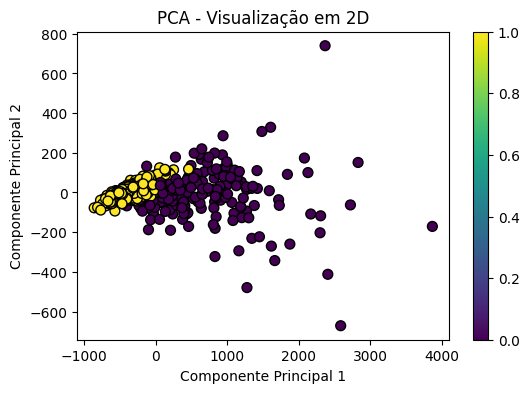

In [14]:
#Carrego a base como vetores numpy
data,labels = load_breast_cancer(return_X_y=True)
print(data.shape, labels.shape)

print(data[0],labels[0])
#Exibição

colours = ('green', 'red', 'blue','yellow',
           'purple','salmon','orange',
           'brown','greenyellow','gray')

n_classes = len(np.unique(labels))

reduce_and_visualize(data,labels,n_dims=2)

In [15]:
#70% treino - 30% test
train_data, test_data, train_labels, test_labels = train_test_split(data, labels,
                       train_size=0.7,
                       test_size=0.3,
                       random_state=random_seed)

#Porção do treinamento fica para validação (70-30)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels,
                       train_size=0.7,
                       test_size=0.3,
                       random_state=random_seed)

knn = KNeighborsClassifier(metric='minkowski',
                           p=2,
                           n_jobs=1,
                           n_neighbors=5)


knn.fit(train_data,train_labels)

predicts = knn.predict(test_data)

acc = accuracy_score(test_labels,predicts)
print(f'\nAcc: {acc}\n')

print(classification_report(test_labels,predicts ))


Acc: 0.9415204678362573

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        53
           1       0.96      0.96      0.96       118

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



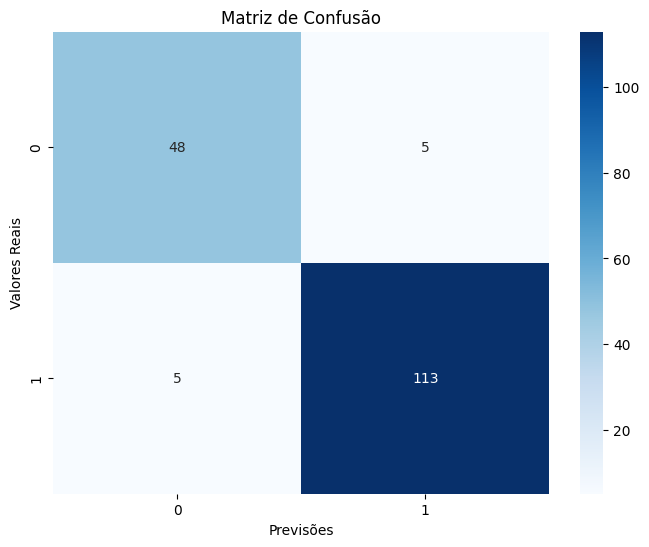

In [16]:
# prompt: gere a matriz de confusão

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# ... (código anterior)

# Gere a matriz de confusão
cm = confusion_matrix(test_labels, predicts)

# Plote a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()


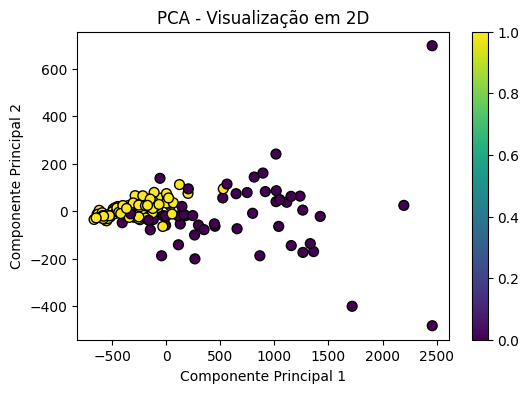

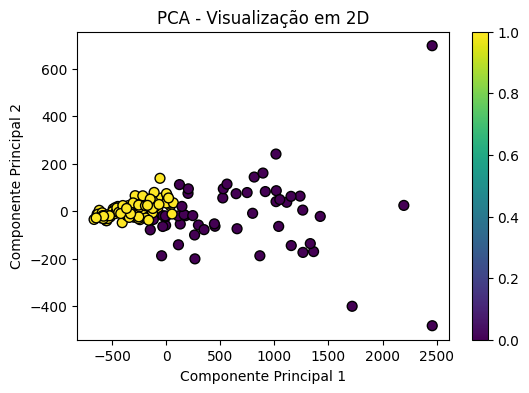

In [18]:
reduce_and_visualize(test_data,test_labels,n_dims=2)
reduce_and_visualize(test_data,predicts,n_dims=2)